# Timeseries smoothing demo

In this notebook we use the backend API to retrieve a time series and then plot it with different smoothing strategies

In [4]:
%matplotlib widget

import httpx
import matplotlib.pyplot as plt
import pandas as pd

coverage_identifier = "tas_absolute-rcp26-DJF"
point_coords = "POINT(11.5469 44.9524)"
date_range = "../.."
api_url = f"http://webapp:5001/api/v2/coverages/time-series/{coverage_identifier}"


def _parse_to_dataframe(time_series: dict):
    df = pd.DataFrame.from_records(time_series["values"])
    df["datetime"] = pd.to_datetime(df["datetime"])
    df.set_index("datetime", inplace=True)
    return df    

In [5]:
raw_response = httpx.get(
    api_url,
    params={
        "coords": point_coords,
        "datetime": date_range,
        "include_coverage_data": True,
        "include_observation_data": True,
        "coverage_data_smoothing": [
            "NO_SMOOTHING",
            "MOVING_AVERAGE_11_YEARS",
            "LOESS_SMOOTHING",
        ],
        "observation_data_smoothing": [
            "NO_SMOOTHING",
            "MOVING_AVERAGE_5_YEARS",
        ],
        "include_coverage_uncertainty": False,
        "include_coverage_related_data": False,
    }
)
raw_response.raise_for_status()

raw_series = raw_response.json()["series"]

series = {s["name"]: s for s in raw_series}

In [6]:
raw_coverage_df = _parse_to_dataframe(series[f"{coverage_identifier}__NO_SMOOTHING"])
smoothed_ma11_coverage_df = _parse_to_dataframe(series[f"{coverage_identifier}__MOVING_AVERAGE_11_YEARS"])
smoothed_loess_coverage_df = _parse_to_dataframe(series[f"{coverage_identifier}__LOESS_SMOOTHING"])

raw_station_df = _parse_to_dataframe(series[f"TDd__NO_SMOOTHING"])
smoothed_ma5_station_df = _parse_to_dataframe(series[f"TDd__MOVING_AVERAGE_5_YEARS"])

### Plotting

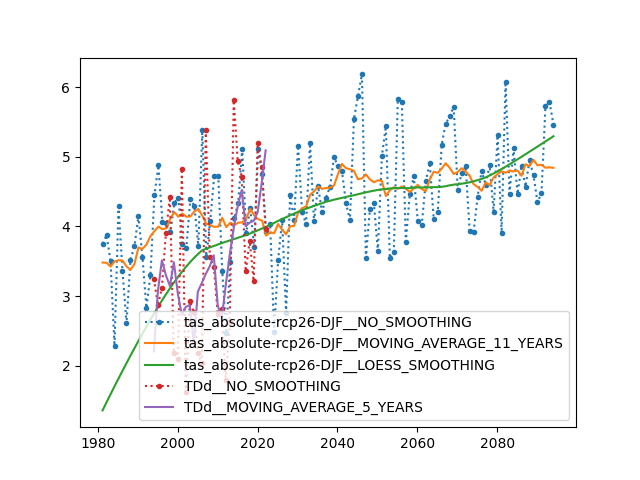

In [7]:
fig, ax = plt.subplots()

raw_tas_line, = ax.plot(raw_coverage_df, label=series[f"{coverage_identifier}__NO_SMOOTHING"]["name"])
raw_tas_line.set_linestyle(":")
raw_tas_line.set_marker(".")

smoothed_ma11_tas_line, = ax.plot(smoothed_ma11_coverage_df, label=series[f"{coverage_identifier}__MOVING_AVERAGE_11_YEARS"]["name"])
smoothed_loess_tas_line, = ax.plot(smoothed_loess_coverage_df, label=series[f"{coverage_identifier}__LOESS_SMOOTHING"]["name"])

raw_station_line, = ax.plot(raw_station_df, label=series["TDd__NO_SMOOTHING"]["name"])
raw_station_line.set_linestyle(":")
raw_station_line.set_marker(".")

smoothed_ma5_station_line, = ax.plot(smoothed_ma5_station_df, label=series["TDd__MOVING_AVERAGE_5_YEARS"]["name"])


ax.legend()

In [42]:
ax.clear()